# Load and analyze measured traces

You need:
* `traceLength.txt`: how many samples per trace (one decimal number)
* `traces.bin`: raw measured traces, one byte per sample (uint8), all traces together continuously

There should be also PT and CT files
* `plaintext.txt`: all PT blocks, (one block per line, in hex, bytes separated by spaces)
* `ciphertext.txt`: all CT blocks, (one block per line, in hex, bytes separated by spaces)

And a screenshot and scope config files

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
from trace_utils import read_trace_length, load_text, load_traces

In [2]:
# Read trace length
trace_length = read_trace_length("traceLength.txt")
print(f"{trace_length = }")

# Select vertical slice of traces to load
tr_start = 13240
tr_end = 921200
tr_len = tr_end - tr_start

# Load all traces, specified slice of each
traces = load_traces("traces.bin", trace_length, tr_start, tr_len)

# convert trace matrix to floats to prevent potential overflows
traces = traces.astype('float32')

# if you do not need the DC offset, you can remove it by subtracting the mean of each trace
# (but do not subtract it if you need it for average current computation)
# traces = traces - np.mean(traces, axis=1, keepdims=True)

print(f"Loaded traces have shape {traces.shape}") # dimensions of matrix of traces

trace_length = 937500
Traces file traces.bin assumed shape (500 x 937500)
Reading all 500 traces, each from 13240, length 907960
Loaded traces have shape (500, 907960)


Display three complete traces: an overlay of the 1st, 100th and 500th in one plot

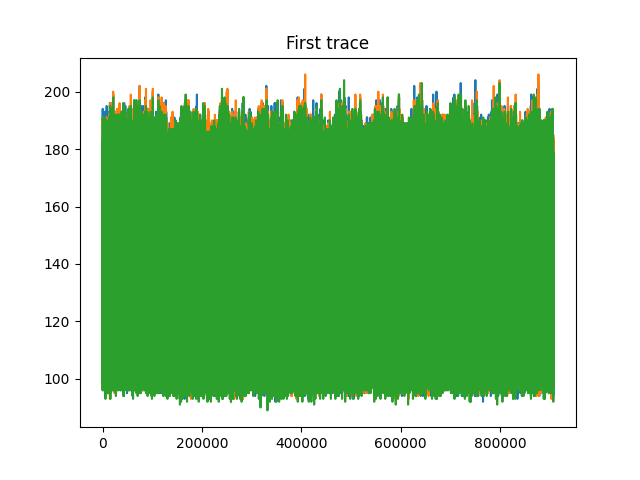

In [3]:
# If you feel brave enough -- interactive plots so that you can zoom
#!pip install ipympl

## Only in Google Colab:
## from google.colab import output
## output.enable_custom_widget_manager()

%matplotlib widget
fig=plt.figure()
plt.plot(traces[[0, 99, 499]].T) # plotting a vector
plt.title("First trace")
plt.show()

Compute and plot vertical variance of the traces (a variance trace). You will probably need to cut the start and end due to the noise induced by the trigger transition


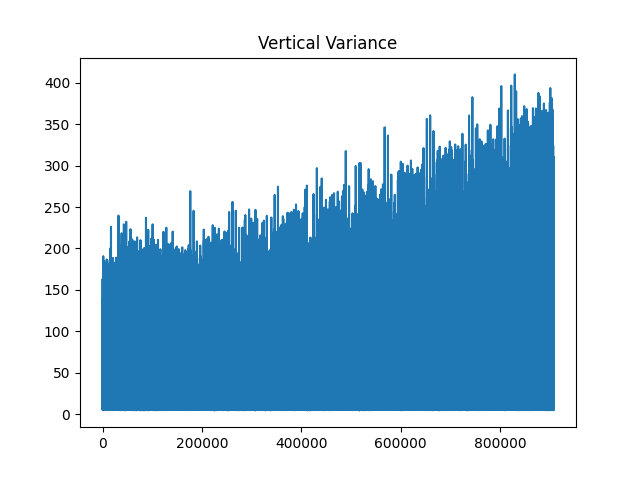

In [4]:
%matplotlib widget
variance_trace = np.var(traces, axis=0)
fig=plt.figure()
plt.plot(variance_trace) # plotting a vector
plt.title("Vertical Variance")
plt.show()

Display a histogram of sample values of one trace while encrypting

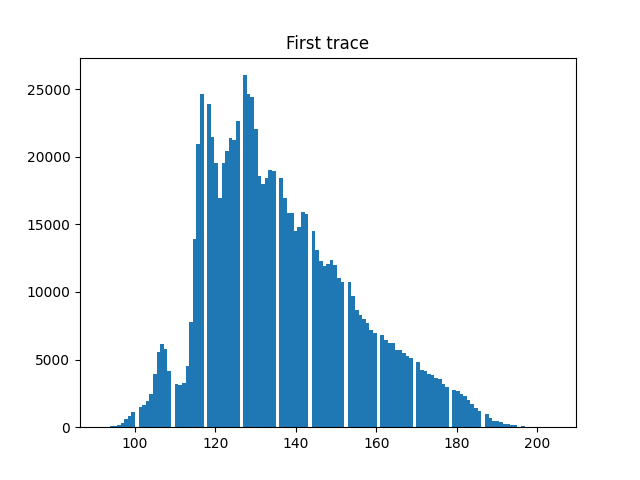

In [5]:
fig=plt.figure()
plt.hist(traces[0], 125) # plotting a vector
plt.title("First trace")
plt.show()

Display a histogram of a vertical slice of the trace sample values at a point of high variance of the traces while encrypting <br>
Display a histogram of a vertical slice of the trace sample values at a point of low variance of the traces while encrypting

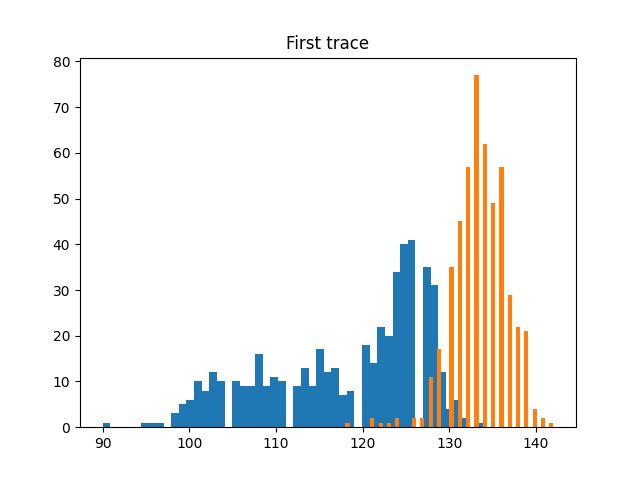

In [6]:
highVarCol = 833000
lowVarCol = 200000
variance_trace[highVarCol]

fig=plt.figure()
plt.hist(traces[:,highVarCol], 50)
plt.hist(traces[:,lowVarCol], 50)
plt.title("First trace")
plt.show()


Check trace alignment: display an overlay of ~100 samples from all traces around:

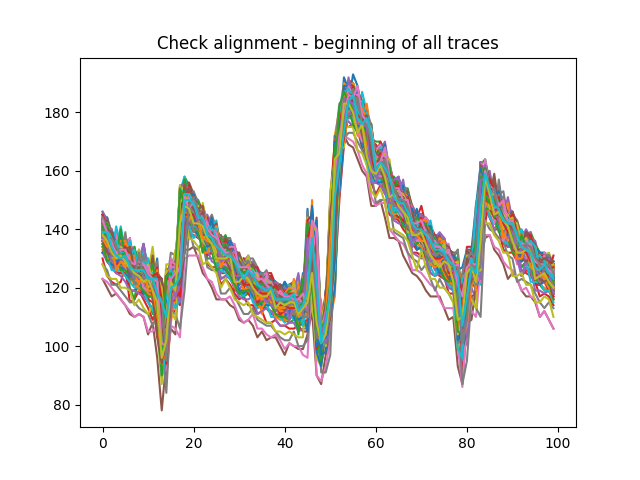

In [7]:
# Plot a detail of the overlay of all traces
fig=plt.figure()
plt.plot(traces[:,14000:14100].T)
plt.title("Check alignment - beginning of all traces")
plt.show()

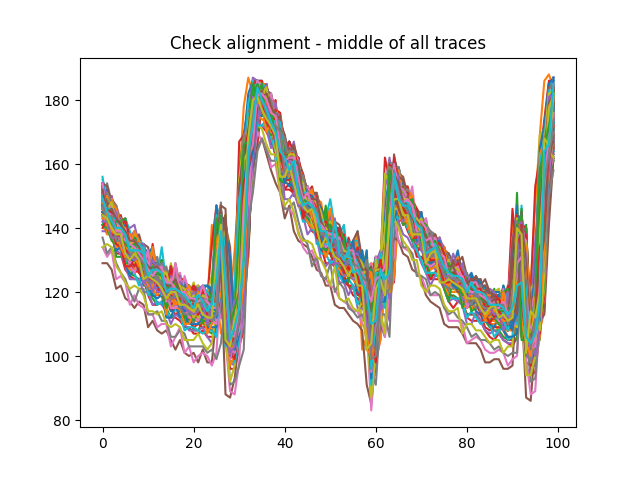

In [8]:
# Plot a detail of the overlay of all traces
fig=plt.figure()
plt.plot(traces[:,450000:450100].T)
plt.title("Check alignment - middle of all traces")
plt.show()

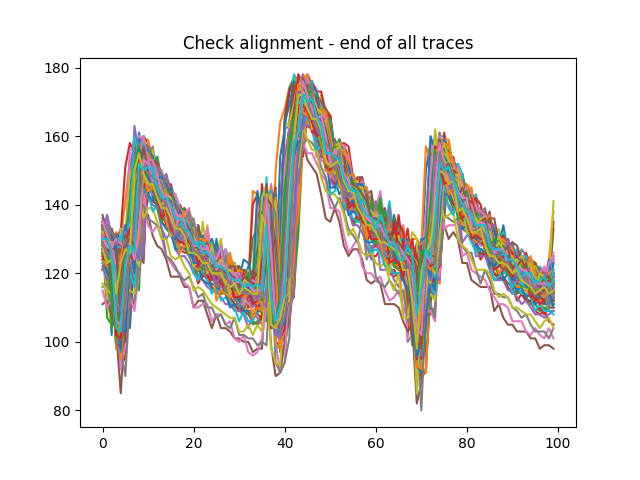

In [9]:
# Plot a detail of the overlay of all traces
fig=plt.figure()
plt.plot(traces[:,900000:900100].T)
plt.title("Check alignment - end of all traces")
plt.show()

Determine the average current draw while encrypting (in mA).

In [10]:
resistor = 50 #ohm

s = np.mean(traces)
d = 100
offset = 571.25
voltage = (s-128)*(8*d)/256 + offset
current = voltage/resistor

print("Average current = %f mA"%(current))

Average current = 11.826225 mA
